# Notebook 5 - Model 4. Neuronal Network Regression 

## Simon Kennedy a1792695

## Loading the clean and preprocessed dataset

In [1]:
import numpy as np
import pandas as pd

cancer_df = pd.DataFrame(pd.read_csv("cancer_clean.csv"))
cancer_df.head()     

,avgAnnCount,TARGET_deathRate,incidenceRate,povertyPercent,studyPerCap,binnedInc,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,...,PctPrivateCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,State
0,1397.0,164.9,489.8,11.2,499.748204,10,36.9,41.7,2.54,52.5,...,75.1,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,47
1,173.0,161.3,411.6,18.6,23.111234,7,32.2,33.7,2.34,44.5,...,70.2,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,47
2,102.0,174.7,349.7,14.6,47.560164,7,44.0,45.8,2.62,54.2,...,63.7,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,47
3,427.0,194.8,430.4,17.1,342.637253,5,42.2,43.4,2.52,52.7,...,58.4,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,47
4,57.0,144.4,350.1,12.5,0.000000,7,47.8,48.9,2.34,57.8,...,61.6,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,47


## Splitting the dataset into Training and Tesing data¶

### Data Segregation

In [2]:
X = cancer_df.drop(columns = ['TARGET_deathRate'])
y = cancer_df['TARGET_deathRate']

X.shape, y.shape

((3009, 26), (3009,))

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
# test_size is default 0.25 if train_size also none. i.e. train = 0.75, train = 0.25
#defining a seed to get the same split in the data
print(X_train.shape)
print(X_test.shape)

(2256, 26)
(753, 26)


## k fold cross-validation to split the data

In [4]:
# Creating the K-Fold ojbect
from sklearn.model_selection import KFold
cv_method = KFold(n_splits = 3)

# Performing the K-Fold Cross-Validation
for train_index, test_index in cv_method.split(cancer_df):
    
    # Obtaining the index for the training and test sets for the subset
    print("First five train index:", train_index[0:5], "First five test index:", test_index[0:5])
    print('Shape of the Training set:', train_index.shape, 'Shape of the Test set:',test_index.shape, '\n')

First five train index: [1003 1004 1005 1006 1007] First five test index: [0 1 2 3 4]
Shape of the Training set: (2006,) Shape of the Test set: (1003,) 

First five train index: [0 1 2 3 4] First five test index: [1003 1004 1005 1006 1007]
Shape of the Training set: (2006,) Shape of the Test set: (1003,) 

First five train index: [0 1 2 3 4] First five test index: [2006 2007 2008 2009 2010]
Shape of the Training set: (2006,) Shape of the Test set: (1003,) 



# Data Modeling

## Model 4. Neuronal Network - Multi layer perceptron regressor model

#### Defining the model with scaling and then fitting the model

In [5]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# make the pipeline
mlp_model = Pipeline([('scaler', MinMaxScaler()),
                      ('mlp', MLPRegressor(max_iter=5000))])
# had to use a very high max_iter as the convergence 
# doesn't occur until >1000
mlp_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('mlp', MLPRegressor(max_iter=5000))])

#### Getting the RMSE of the predictions

In [6]:
from sklearn.metrics import mean_squared_error

# predicting on the training data
y_train_predict = mlp_model.predict(X_train)
# predicting on the test data
y_test_predict = mlp_model.predict(X_test)

MSE_train = mean_squared_error(y_train, y_train_predict)
RMSE_train = np.sqrt(MSE_train)
MSE_test = mean_squared_error(y_test, y_test_predict)
RMSE_test = np.sqrt(MSE_test)

print('The Neuronal Network mlp model Mean Square Error on training data is : ', MSE_train)
print('The Neuronal Network mlp model RMSE on training data is ', RMSE_train)
print('The Neuronal Network mlp model Mean Square Error on test data is : ', MSE_test)
print('The Neuronal Network mlp model RMSE on test data is ', RMSE_test)

The Neuronal Network mlp model Mean Square Error on training data is :  353.5417092366601
The Neuronal Network mlp model RMSE on training data is  18.80270483831143
The Neuronal Network mlp model Mean Square Error on test data is :  372.7407504917035
The Neuronal Network mlp model RMSE on test data is  19.30649503384039


The RMSE of the test data is slightly greater than on the training data which gives some indication that the model is not over or under fitted.

# Hyperparameter tuning

## Creating the parameter grid and using GridSearchCV to find the best parameters

In [7]:
mlp_model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'mlp', 'scaler__clip', 'scaler__copy', 'scaler__feature_range', 'mlp__activation', 'mlp__alpha', 'mlp__batch_size', 'mlp__beta_1', 'mlp__beta_2', 'mlp__early_stopping', 'mlp__epsilon', 'mlp__hidden_layer_sizes', 'mlp__learning_rate', 'mlp__learning_rate_init', 'mlp__max_fun', 'mlp__max_iter', 'mlp__momentum', 'mlp__n_iter_no_change', 'mlp__nesterovs_momentum', 'mlp__power_t', 'mlp__random_state', 'mlp__shuffle', 'mlp__solver', 'mlp__tol', 'mlp__validation_fraction', 'mlp__verbose', 'mlp__warm_start'])

In [8]:
from sklearn.model_selection import GridSearchCV
#hyperparameters to calibrate
param_grid = {
    'mlp__hidden_layer_sizes': [(10,10,10), (50,50,50), (100,100,100)],
    'mlp__activation': ['tanh', 'relu'],
    'mlp__solver': ['sgd', 'adam', 'lbfgs'],
    'mlp__alpha': [0.0001, 0.05, 0.1],
    'mlp__learning_rate': ['constant', 'adaptive'], 
}
#searching for the optimal parameter from param_grid
grid_mlp = GridSearchCV(mlp_model, param_grid, cv=cv_method, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2) 

%time grid_mlp.fit(X_train, y_train)
print('best parameters for mlp model', grid_mlp.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


C:\Users\skent\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-2.74881071e+001 -2.74811739e+001 -2.50636476e+001 -2.74807979e+001
 -2.74822152e+001 -2.54080401e+001 -2.74855859e+001 -2.74803865e+001
 -2.30388424e+001 -2.74790974e+001 -2.74817347e+001 -2.72636317e+001
 -2.74990786e+001 -2.74797876e+001 -2.83402372e+001 -2.74796076e+001
 -2.74799593e+001 -2.83350475e+001 -2.74834182e+001 -2.04250318e+001
 -2.02620420e+001 -2.74754446e+001 -1.99738047e+001 -2.33235168e+001
 -2.74517838e+001 -2.74788288e+001 -2.45214803e+001 -2.74777305e+001
 -2.74779063e+001 -2.76441010e+001 -2.75056870e+001 -2.74809597e+001
 -2.98233126e+001 -2.74805486e+001 -2.74780560e+001 -2.73961198e+001
 -2.74817669e+001 -2.02001645e+001 -2.32759578e+001 -2.74795422e+001
 -2.00293664e+001 -2.07779512e+001 -2.74833213e+001 -2.74809798e+001
 -2.44566345e+001 -2.74778915e+001 -2.74774266e+001 -2.36484613e+001
 -2.74944734e+001 -2.74816959

Wall time: 22min 1s
best parameters for mlp model {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (100, 100, 100), 'mlp__learning_rate': 'constant', 'mlp__solver': 'adam'}


#### Assigning the best parameters to the model using grid.best_estimator_

In [9]:
mlp_tuned = grid_mlp.best_estimator_
mlp_tuned 

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('mlp',
                 MLPRegressor(hidden_layer_sizes=(100, 100, 100),
                              max_iter=5000))])

#### Getting the performance of the TUNED model on the testing data

In [10]:
# predicting on the training data
y_tuned_train_predict = mlp_tuned.predict(X_train)
# predicting on the test data
y_tuned_test_predict = mlp_tuned.predict(X_test)

MSE_tuned_train = mean_squared_error(y_train, y_tuned_train_predict)
RMSE_tuned_train = np.sqrt(MSE_tuned_train)
MSE_tuned_test = mean_squared_error(y_test, y_tuned_test_predict)
RMSE_tuned_test = np.sqrt(MSE_tuned_test)

print('The TUNED Neuronal Network model Mean Square Error on training data is : ', MSE_tuned_train)
print('The TUNED Neuronal Network model RMSE on training data is ', RMSE_tuned_train)
print('The TUNED Neuronal Network model Mean Square Error on test data is : ', MSE_tuned_test)
print('The TUNED Neuronal Network model RMSE on test data is ', RMSE_tuned_test)

The TUNED Neuronal Network model Mean Square Error on training data is :  325.29407071721806
The TUNED Neuronal Network model RMSE on training data is  18.035910587414712
The TUNED Neuronal Network model Mean Square Error on test data is :  337.45492013559567
The TUNED Neuronal Network model RMSE on test data is  18.36994611139607


The difference in training and testing RMSE remains reasonable.

In [11]:
print('Best Cross-Validation Accuracy: ', grid_mlp.best_score_)

Best Cross-Validation Accuracy:  -19.606517981539056


## Table of performance results

In [12]:
from tabulate import tabulate

#create data
data = [["Baseline", 823.34, 28.69], 
        ["Untuned", MSE_test, RMSE_test],
       ["Tuned", MSE_tuned_test, RMSE_tuned_test]]
  
#define header names
col_names = ["Model", "MSE", "RMSE"]
  
#display table
print(tabulate(data, headers = col_names))

Model         MSE     RMSE
--------  -------  -------
Baseline  823.34   28.69
Untuned   372.741  19.3065
Tuned     337.455  18.3699


### Plotting the predicted values against the real values

[]

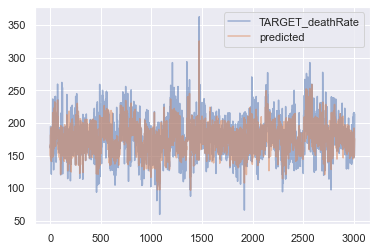

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

cancer_df['predicted'] = mlp_tuned.predict(X)
cancer_df[['TARGET_deathRate', 'predicted']].plot(alpha=0.5)

plt.plot()

## 7. Saving the model for future use

In [14]:
import pickle

filename = 'Optimal_Trained_mlp_model.sav'
pickle.dump(mlp_tuned, open(filename, 'wb'))

#### Checking that it has worked by reloading the model and predicting

In [21]:
filename = 'Optimal_Trained_mlp_model.sav'
mlp_model_reloaded = pickle.load(open(filename, 'rb'))

reload_y_predict = mlp_model_reloaded.predict(X_test) 

print(reload_y_predict.shape)
print(reload_y_predict[0:5])

(753,)
[172.46443572 151.40300515 165.46055535 169.22076902 171.28622011]


#### Check the accuracy

In [22]:
MSE_reload = mean_squared_error(y_test, reload_y_predict)
RMSE_reload = np.sqrt(MSE_reload)
print('The RMSE of the reloaded model on test data is ', RMSE_reload)

The RMSE of the reloaded model on test data is  18.36994611139607


This matches the RMSE of the original mlp_tuned model.